ML Data Cleaning and Feature Selection
About Dataset

https://www.kaggle.com/datasets/rajyellow46/wine-quality

Wine Quality Data [ Chateau Montelena]

Content

This data file includes all the parameters which is needed to determine the quality of the wine.

Acknowledgements

This is a public dataset and the original source can be found on the above website.

Inspiration

What can we learn about different wines and its contents? What can we learn from predictions? (ex: alocohol, fixed-acididty etc) Which wines have more sulpur and how it affects its quality?

Aim:
The project aims at answering the following question with the current dataset.

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

**Chateau Montelena is a Napa Valley winery most famous for winning the white wine section of the historic "Judgment of Paris" wine competition.**

In [2]:
Chateau_Montelena = pd.read_csv('C:\\Users\\risha\\OneDrive\\Desktop\\DSEM\\winequalityN.csv')

In [3]:
Chateau_Montelena.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
Chateau_Montelena.shape

(6497, 13)

**What are the data types? (Only numeric and categorical)**

In [5]:
Chateau_Montelena.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

The dataset has 1 Categorical and 12 Numerical Features.

**What features are in the dataset?**

fixed acidity. Fixed acidity is due to the presence of non-volatile acids in wine. For example, tartaric, citric or malic acid. This type of acid combines the balance of the taste of wine, brings freshness to the taste.

Volatile acidity is the part of the acid in wine that can be picked up by the nose. Unlike those acids that are palpable to the taste (as we talked about above). Volatile acidity, or in other words, souring of wine, is one of the most common defects.

citric acid - allowed to offer in winemaking by the Resolution of the OIV No. 23/2000. It can be used in three cases: for acid treatment of wine (increasing acidity), for collecting wine, for cleaning filters from possible fungal and mold infections.

residual sugar is that grape sugar that has not been fermented in alcohol

chlorides. The structure of the wine also depends on the content of minerals in the wine, which determine the taste sensation such as salinity (sapidità). Anions of inorganic acids (chlorides, sulfates, sulfites..), anions of transferred acids, metal cations (potassium, sodium, magnesium...) are found in wine. Their content depends mainly on the climatic zone (cold or warm region, salty soils depending on the observation of the sea), oenological practices, storage and aging of wine.

free sulfur dioxide, total sulfur dioxide - Sulfur dioxide (sulfur oxide, sulfur dioxide, readiness E220, SO2) is used as a preservative due to its antioxidant and antimicrobial properties. Molecular SO2 is an extremely important antibiotic, affecting significant consumption (including wild yeast) that can manifest itself in wine spoilage.

Density - The density of wine can be either less or more than water. Its value is determined primarily by the concentration of alcohol and sugar. White, rosé and red wines are generally light - their density at 20°C is below 998.3 kg/m3.

pH is a measure of the acidity of wine. All wines ideally have a pH level between 2.9 and 4.2. The lower the pH, the more acidic the wine; the lower the pH, the less acidic the wine.

Sulfates are a natural result of yeast fermenting the sugar in wine into alcohol. That is, the presence of sulfites in wine is excluded.

alcohol - The alcohol content in wines depends on many tastes: the grape variety and the amount of sugar in the berries, production technology and growing conditions. Wines vary greatly in degree: this Parameter varies from 4.5 to 22 depending on the category.

quality is a target.

**Are there missing values?**

In [6]:
Chateau_Montelena.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

**Which independent variables have missing data? How much?**

fixed acidity       -    10

volatile acidity    -    8

citric acid         -    3

residual sugar      -    2

chlorides           -    2

pH                  -    9

sulphates           -    4

The above features have the respective number of missing data. Since the data is more symmetric, mean replacement would be better.


Before examining quality feature, categorical variables will be mapped with help of cat.code. This will assist to make easier and comprehensible data analysis.

In [7]:
Chateau_Montelena['type'] = Chateau_Montelena['type'].astype("category").cat.codes
Chateau_Montelena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int8   
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), int8(1)
memory usage: 615.6 KB


**1. Mean**

In [8]:
# mean = Chateau_Montelena["fixed acidity"].mean()
# Chateau_Montelena["fixed acidity"].fillna(mean,inplace=True)
# Chateau_Montelena["fixed acidity"].isnull().sum()

# mean2 = Chateau_Montelena["volatile acidity"].mean()
# Chateau_Montelena["volatile acidity"].fillna(mean2,inplace=True)
# Chateau_Montelena["volatile acidity"].isnull().sum()

# mean3 = Chateau_Montelena["citric acid"].mean()
# Chateau_Montelena["citric acid"].fillna(mean3,inplace=True)
# Chateau_Montelena["citric acid"].isnull().sum()

# mean4 = Chateau_Montelena["residual sugar"].mean()
# Chateau_Montelena["residual sugar"].fillna(mean4,inplace=True)
# Chateau_Montelena["residual sugar"].isnull().sum()

# mean5 = Chateau_Montelena["chlorides"].mean()
# Chateau_Montelena["chlorides"].fillna(mean5,inplace=True)
# Chateau_Montelena["chlorides"].isnull().sum()

# mean6 = Chateau_Montelena["pH"].mean()
# Chateau_Montelena["pH"].fillna(mean6,inplace=True)
# Chateau_Montelena["pH"].isnull().sum()

# mean7 = Chateau_Montelena["sulphates"].mean()
# Chateau_Montelena["sulphates"].fillna(mean7,inplace=True)
# Chateau_Montelena["sulphates"].isnull().sum()

# Chateau_Montelena.isnull().sum()

**2. KNN Imputer**

In [9]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer(n_neighbors=5)
Chateau_Montelena = pd.DataFrame(imputer.fit_transform(Chateau_Montelena), columns = Chateau_Montelena.columns)

Chateau_Montelena.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**What are the likely distributions of the numeric variables? & What are the distributions of the predictor variables?**

In below above, the good fit indicates that normality is a reasonable approximation.

Distribution of Predictors

C:\Users\risha\AppData\Local\Temp\ipykernel_20380\3166592433.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Chateau_Montelena[i], fit = norm)
C:\Users\risha\AppData\Local\Temp\ipykernel_20380\3166592433.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Chateau_Montelena[i], fit = norm)
C:

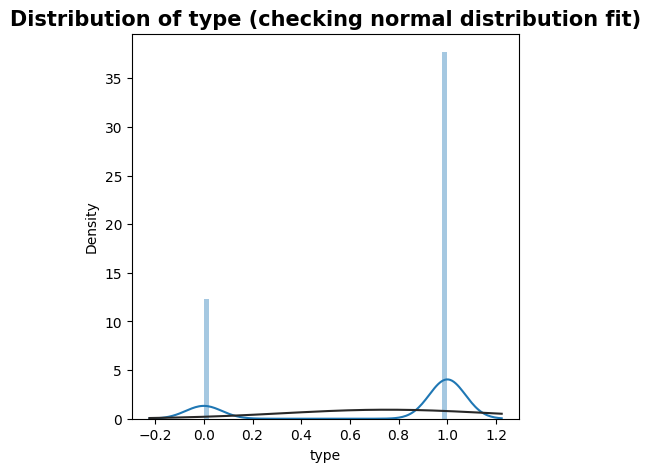

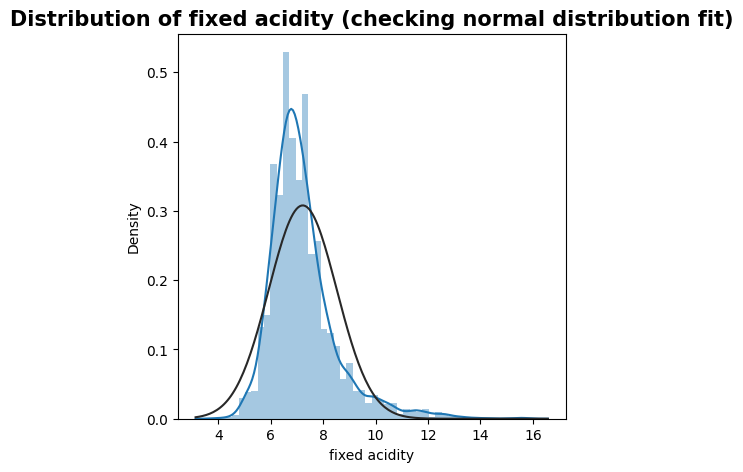

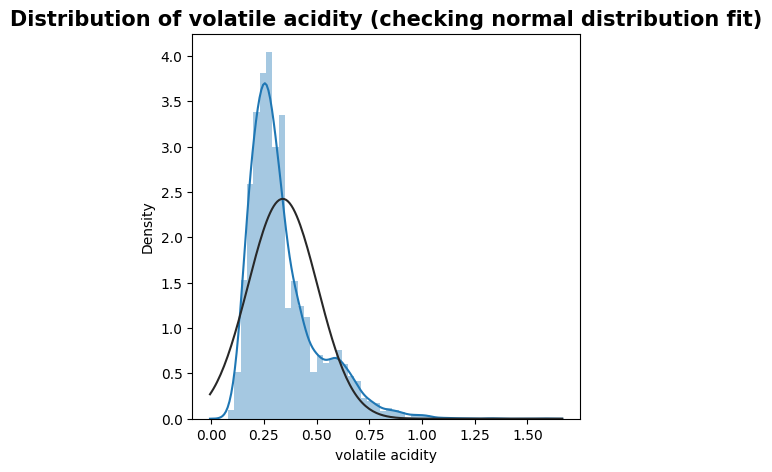

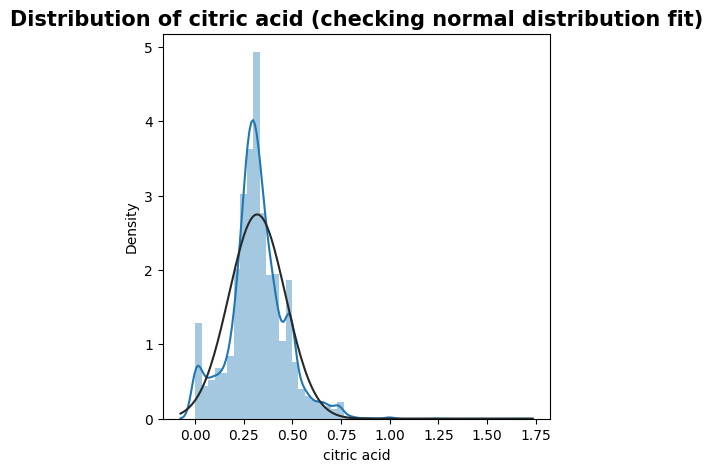

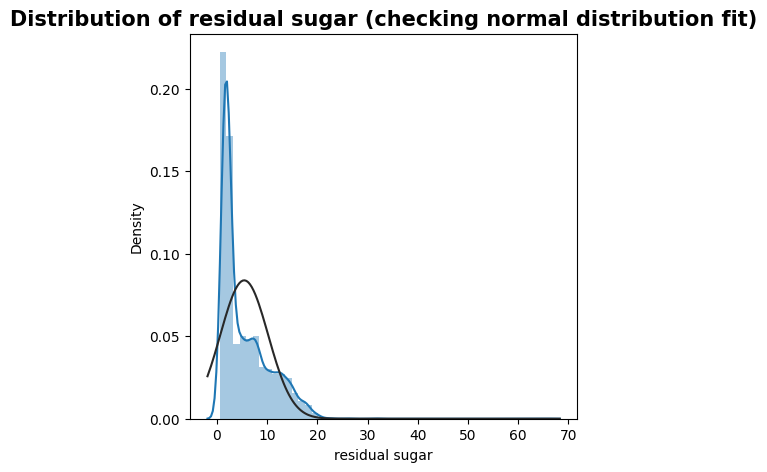

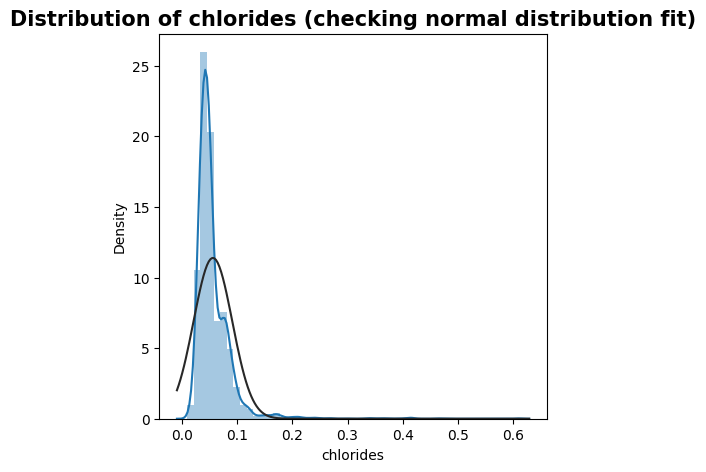

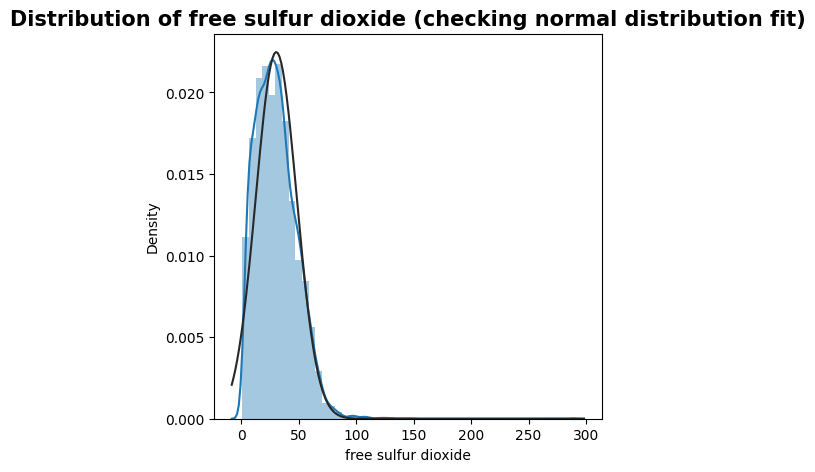

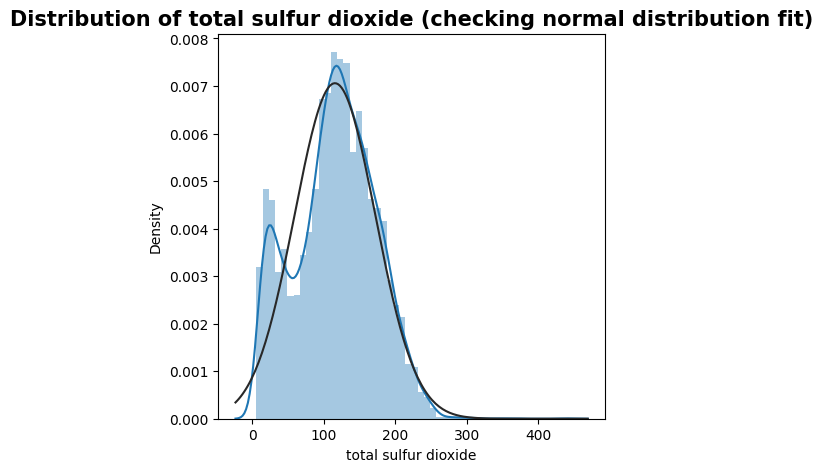

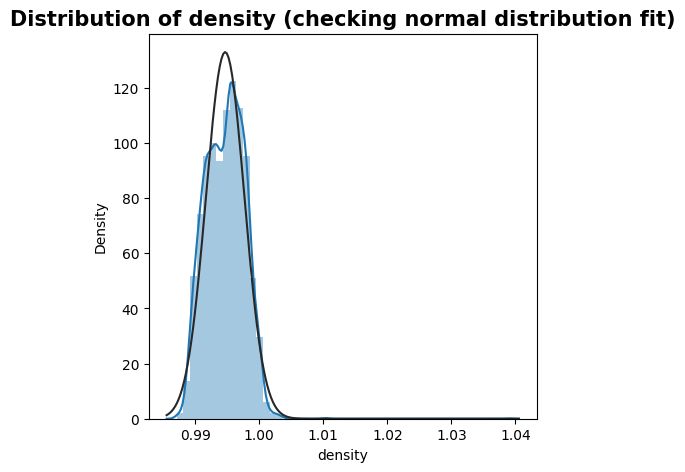

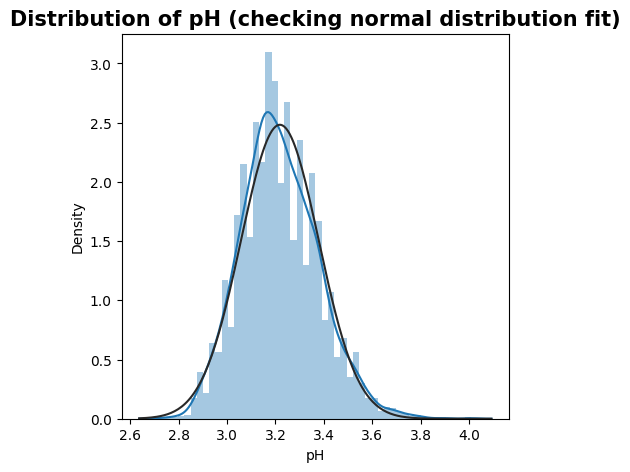

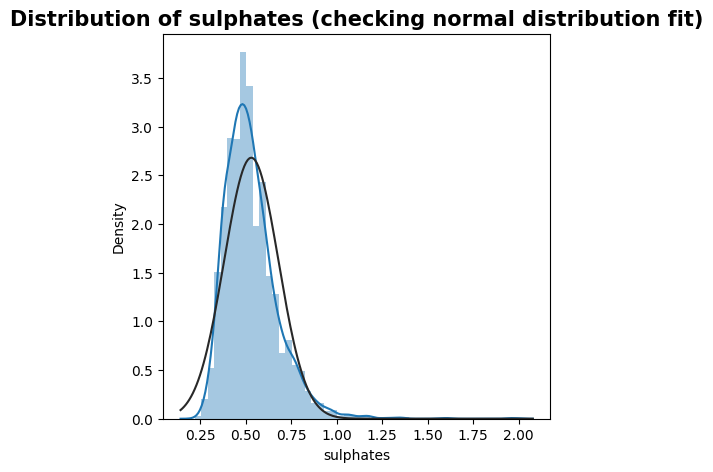

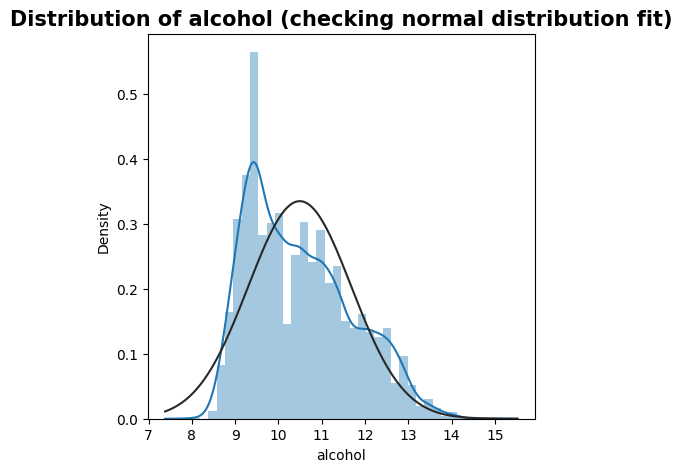

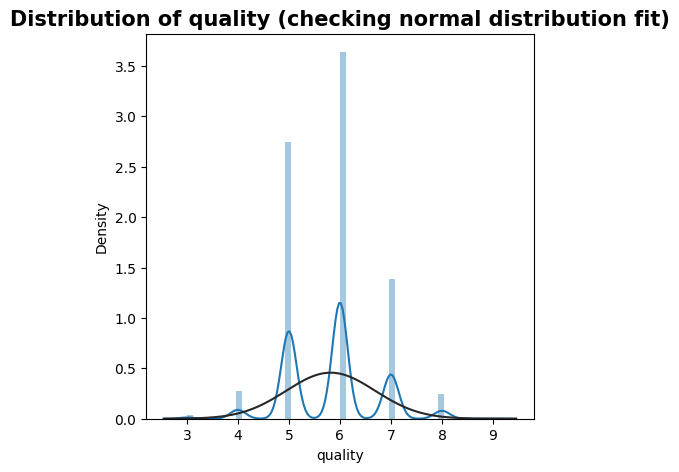

In [10]:
Chateau_MontelenaColumnList = Chateau_Montelena.columns 
for i in Chateau_MontelenaColumnList:
    plt.figure(figsize= (5,5))
    sns.distplot(Chateau_Montelena[i], fit = norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",size = 15, weight = "bold")

type : categorical values 

fixed acidity : nomral distribution

volatile acidity : almost normal distribution with a bit of right-skewness

citric acid : almost normal distribution with a bit of edge-peak

residual sugar : almost normal distribution with a bit of right-skewness

chlorides : almost normal distribution with a bit of right-skewness

free sulfur dioxide : nomral distribution

total sulfur dioxide : almost normal distribution with a bit of edge-peak

sulphates :  normal distribution

alcohol : almost normal distribution with a bit of right-skewness

pH : normal distribution

density : normal distribution


**Do the ranges of the predictor variables make sense?**

In [11]:
#Range of each column
Chateau_Montelena.max() - Chateau_Montelena.min()
Chateau_Montelena.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.216501,0.339634,0.318675,5.445704,0.056041,30.525319,115.744574,0.994697,3.218424,0.531273,10.491801,5.818378
std,0.430779,1.295928,0.164563,0.145267,4.758043,0.035032,17.749400,56.521855,0.002999,0.160715,0.148808,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The ranges make sense for each attribute that a wine constitutes.
The range of "total sulphur dioxide" variable is high, this implies high variablity in it's distribution.



**Do the training and test sets have the same data?**

By using test_train_split, the train and test sets are split at a ratio of 80/20 from the same dataset. But both sets are distinct and is not seen by the model during the training phase. Although the distribution of each attribute is proportional in both train and test sets.

**Phase 1**

In [12]:
Chateau_Montelena_x = Chateau_Montelena[['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol','pH','density']]
Chateau_Montelena_y = Chateau_Montelena['quality']
# .iloc[:,:12], Chateau_Montelena.iloc[:,-1]
Chateau_Montelena_y.head()

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: quality, dtype: float64

In [13]:
scaler = StandardScaler()
# #Dataframe Chateau_Montelena with outliers 
Chateau_Montelena_x = scaler.fit_transform(Chateau_Montelena_x)

[Text(0, 0, 'type'),
 Text(1, 0, 'fixed acidity'),
 Text(2, 0, 'volatile acidity'),
 Text(3, 0, 'citric acid'),
 Text(4, 0, 'residual sugar'),
 Text(5, 0, 'chlorides'),
 Text(6, 0, 'free sulfur dioxide'),
 Text(7, 0, 'total sulfur dioxide'),
 Text(8, 0, 'density'),
 Text(9, 0, 'pH'),
 Text(10, 0, 'sulphates'),
 Text(11, 0, 'alcohol')]

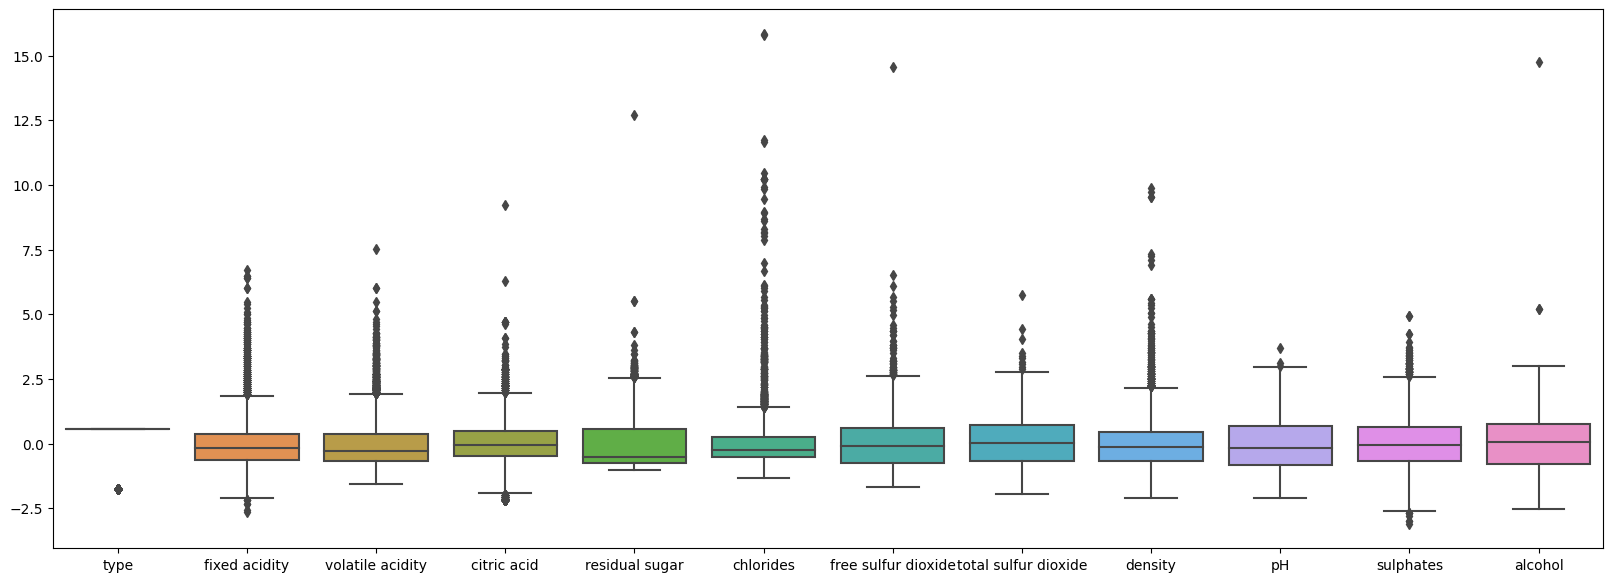

In [14]:
plt.figure(figsize=(20,7))

ax = sns.boxplot(data=Chateau_Montelena_x)
ax.set_xticklabels(Chateau_MontelenaColumnList[:12])

In [15]:
#Splitting the dataset with outlier into Train and Test sets at 80-20 proportion
X_train, X_test, y_train, y_test = train_test_split(Chateau_Montelena_x, Chateau_Montelena_y, test_size=0.2,random_state=42)

In [16]:
X_train.shape

(5197, 12)

In [17]:
X_test.shape

(1300, 12)

**Model Buidling**


**Linear Regression Model**

In [18]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)
print('--Phase-1--')
mae1 = mean_absolute_error(y_test, lr_pred)
print('MAE: %f'% mae1)
rmse1= np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE: %f'% rmse1)
r21 = r2_score(y_test, lr_pred)
print('R2: %f' % r21)



--Phase-1--
MAE: 0.545152
RMSE: 0.686665
R2: 0.340363


c:\users\risha\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


3 metrics will be calculated for evaluating predictions.

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

C:\Users\risha\AppData\Local\Temp\ipykernel_20380\2228885370.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\risha\AppData\Local\Temp\ipykernel_20380\2228885370.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

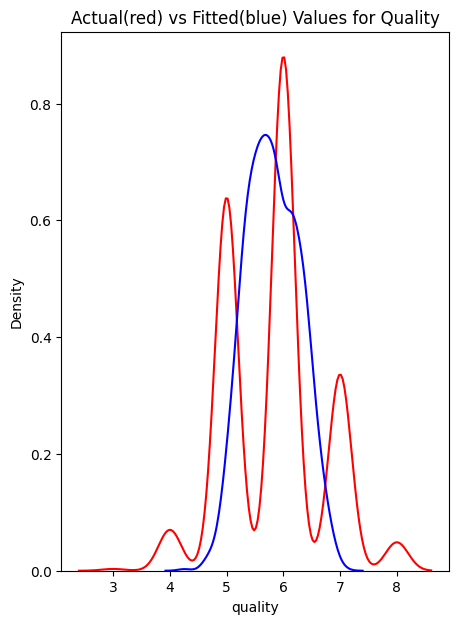

In [19]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lr_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality')


plt.show()
plt.close()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=1, n_estimators=1000)
model2.fit(X_train, y_train)
Rm_pred = model2.predict(X_test)

print('--Phase-1--')
mae2 = mean_absolute_error(y_test, Rm_pred)
print('MAE: %f'% mae2)
rmse2 = np.sqrt(mean_squared_error(y_test, Rm_pred))
print('RMSE: %f'% rmse2 )
r22 = r2_score(y_test, Rm_pred)
print('R2: %f' % r22)

In [ ]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Rm_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality')


plt.show()
plt.close()

**Descision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(max_depth=6)
model3.fit(X_train, y_train)
Dt_pred = model3.predict(X_test)

print('--Phase-1--')
mae3 = mean_absolute_error(y_test, Dt_pred)
print('MAE: %f'% mae3)
rmse3 = np.sqrt(mean_squared_error(y_test, Dt_pred))
print('RMSE: %f'% rmse3)   
r23 = r2_score(y_test, Dt_pred)
print('R2: %f' % r23)


In [ ]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Dt_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality')


plt.show()
plt.close()

**Phase 2**

**In the predictor variables independent of all the other predictor variables?**

**Multicollinearity**

Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

In this kernel, multicollinearity will be checked when plotting a correlation heatmap.



**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**
For a regression model, the most useful Independent Variables can be statistically determined using the following methods:

f_regression

mutual_info_regression

Correlation Matrix with Heatmap

Each of the following method is applied below to the dataset.

1. f_regression

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
X = Chateau_Montelena.iloc[:,0:12]
y = Chateau_Montelena.iloc[:,-1]
# y=y.astype('int')
# y = pd.DataFrame(y)
# y.head(10)
# y.describe()

In [ ]:
#Applying SelectKBest class to extract top features
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.rcParams["figure.figsize"] = (30,10)
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.xticks([i for i in range(len(f_selector.scores_))], Chateau_MontelenaColumnList[:12])
plt.ylabel("F-value (transformed from the correlation values)")

plt.show()
# bestFeatures = SelectKBest(score_func= chi2, k =12)
# fit = bestFeatures.fit(X,y)

we can see that volatile acidity, chlorides, density and alcohol have more importance than the others.

2.Mutual information metric

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_, align = 'center')
plt.xlabel("feature index")
plt.xticks([i for i in range(len(f_selector.scores_))], Chateau_MontelenaColumnList[:12])
plt.ylabel("Estimated MI value")
# plt.rcParams["figure.figsize"] = (30,10)
plt.show()

**3. Correlation Matrix with HeatMap**

In [ ]:
corrmat = Chateau_Montelena.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap
g = sns.heatmap(Chateau_Montelena[top_corr_features].corr(), annot= True, cmap='RdYlGn')

By looking at the correlation mattrix above we can gain the following insights:
1. volatile acidity and chlorides is highly (-ve) correlated with type.
2. alcohol is highly (-ve) correlated with density.
3. total sulpher dioxide is highly (+ve) correlated with type.

By looking at the 3 feature importance methods above, we can see that volatile acidity, chlorides, density and alcohol are the common most important features in predicting the value of quality.

**Outlier Treatment**


In [ ]:
Q1fixed,Q3fixed = np.percentile(Chateau_Montelena['fixed acidity'] , [25,75])
IQRfixed = Q3fixed - Q1fixed

Ufixed_acidity = Q3fixed + 1.5*IQRfixed

Lfixed_acidity = Q1fixed - 1.5*IQRfixed

print(Ufixed_acidity)
print(Lfixed_acidity)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['fixed acidity'] < Lfixed_acidity].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['fixed acidity'] > Ufixed_acidity].index, inplace=True)


In [ ]:
Q1volatile,Q3volatile = np.percentile(Chateau_Montelena['volatile acidity'] , [25,75])
IQRvolatile = Q3volatile - Q1volatile

Uvolatile_acidity = Q3volatile + 1.5*IQRvolatile 
Lvolatile_acidity= Q1volatile - 1.5*IQRvolatile


print(Uvolatile_acidity)
print(Lvolatile_acidity)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['volatile acidity'] < Lvolatile_acidity].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['volatile acidity'] > Uvolatile_acidity].index, inplace=True)


In [ ]:
Q1citric,Q3citric = np.percentile(Chateau_Montelena['citric acid'] , [25,75])
IQRcitric = Q3citric - Q1citric

Ucitric_acid = Q3citric + 1.5*IQRcitric
Lcitric_acid= Q1citric - 1.5*IQRcitric

print(Ucitric_acid)
print(Lcitric_acid)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['citric acid'] < Lcitric_acid].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['citric acid'] > Ucitric_acid].index, inplace=True)


In [ ]:
Q1residual,Q3residual = np.percentile(Chateau_Montelena['residual sugar'] , [25,75])
IQRresidual = Q3residual - Q1residual

Uresidual_sugar = Q3residual + 1.5*IQRresidual

Lresidual_sugar= Q1residual - 1.5*IQRresidual

print(Uresidual_sugar)
print(Lresidual_sugar)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['residual sugar'] < Lresidual_sugar].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['residual sugar'] > Uresidual_sugar].index, inplace=True)



In [ ]:
Q1chlorides,Q3chlorides = np.percentile(Chateau_Montelena['chlorides'] , [25,75])
IQRchlorides = Q3chlorides - Q1chlorides

Uchlorides = Q3chlorides + 1.5*IQRchlorides
                                                          # Chateau_Montelena['chlorides'].mean() + 3*Chateau_Montelena['chlorides'].std()
Lchlorides= Q1chlorides - 1.5*IQRchlorides
                                                          # Chateau_Montelena['chlorides'].mean() - 3*Chateau_Montelena['chlorides'].std()

print(Uchlorides)
print(Lchlorides)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['chlorides'] < Lchlorides].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['chlorides'] > Uchlorides].index, inplace=True)


In [ ]:
Q1free_sulfur,Q3free_sulfur = np.percentile(Chateau_Montelena['free sulfur dioxide'] , [25,75])
IQRfree_sulfur = Q3free_sulfur - Q1free_sulfur

Ufree_sulfur_dioxide = Q3free_sulfur + 1.5*IQRfree_sulfur

Lfree_sulfur_dioxide= Q1free_sulfur - 1.5*IQRfree_sulfur

print(Ufree_sulfur_dioxide)
print(Lfree_sulfur_dioxide)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['free sulfur dioxide'] < Lfree_sulfur_dioxide].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['free sulfur dioxide'] > Ufree_sulfur_dioxide].index, inplace=True)


In [ ]:
Q1total_sulfur,Q3total_sulfur = np.percentile(Chateau_Montelena['total sulfur dioxide'] , [25,75])
IQRtotal_sulfur = Q3total_sulfur - Q1total_sulfur


Utotal_sulfur_dioxide = Q3total_sulfur + 1.5*IQRtotal_sulfur
Ltotal_sulfur_dioxide= Q1total_sulfur - 1.5*IQRtotal_sulfur 

print(Utotal_sulfur_dioxide)
print(Ltotal_sulfur_dioxide)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['total sulfur dioxide'] < Ltotal_sulfur_dioxide].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['total sulfur dioxide'] > Utotal_sulfur_dioxide].index, inplace=True)


In [ ]:
Q1sulphates,Q3sulphates = np.percentile(Chateau_Montelena['sulphates'] , [25,75])
IQRsulphates = Q3sulphates - Q1sulphates

Usulphates = Q3sulphates + 1.5*IQRsulphates 
Lsulphates=  Q1sulphates - 1.5*IQRsulphates

print(Usulphates)
print(Lsulphates)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['sulphates'] < Lsulphates].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['sulphates'] > Usulphates].index, inplace=True)


In [ ]:
Q1alcohol,Q3alcohol = np.percentile(Chateau_Montelena['alcohol'] , [25,75])
IQRalcohol = Q3alcohol - Q1alcohol

Ualcohol = Q3alcohol + 1.5*IQRalcohol
Lalcohol= Q1alcohol - 1.5*IQRalcohol 


print(Ualcohol)
print(Lalcohol)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['alcohol'] < Lalcohol].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['alcohol'] > Ualcohol].index, inplace=True)


In [ ]:
Q1pH,Q3pH = np.percentile(Chateau_Montelena['pH'] , [25,75])
IQRpH = Q3pH - Q1pH

UpH = Q3pH + 1.5*IQRpH
LpH= Q1pH - 1.5*IQRpH


print(UpH)
print(LpH)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['pH'] < LpH].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['pH'] > UpH].index, inplace=True)


In [ ]:
Q1density,Q3density = np.percentile(Chateau_Montelena['density'] , [25,75])
IQRdensity = Q3density - Q1density
Udensity = Q3density + 1.5*IQRdensity

Ldensity= Q1density - 1.5*IQRdensity 


print(Udensity)
print(Ldensity)

Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['density'] < Ldensity].index, inplace=True)
Chateau_Montelena.drop(Chateau_Montelena[Chateau_Montelena['density'] > Udensity].index, inplace=True)


In [ ]:
Chateau_Montelena.describe()

In [ ]:
# Chateau_Montelena.drop([9])
Chateau_Montelena_cleaned_x,Chateau_Montelena_cleaned_y = Chateau_Montelena.iloc[:,:12], Chateau_Montelena.iloc[:,-1]
Chateau_Montelena_cleaned_x.shape

In [ ]:
Chateau_Montelena_cleaned_x = scaler.fit_transform(Chateau_Montelena_cleaned_x)

In [ ]:
#Splitting the dataset after outlier treatment into Train and Test sets at 80-20 proportion
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(Chateau_Montelena_cleaned_x, Chateau_Montelena_cleaned_y, test_size=0.2,random_state=42)

In [ ]:
plt.figure(figsize=(20,7))

ax = sns.boxplot(data=Chateau_Montelena_cleaned_x)
ax.set_xticklabels(Chateau_MontelenaColumnList[:12])

In [ ]:
##Linear Regression
# lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(Xclean_train, yclean_train)
lrclean_pred= lr.predict(Xclean_test)
# model2 = RandomForestRegressor(random_state=1, n_estimators=1000)
model2.fit(Xclean_train, yclean_train)
Rmclean_pred = model2.predict(Xclean_test)
model3.fit(Xclean_train, yclean_train)
Dtclean_pred = model3.predict(Xclean_test)


In [ ]:
print('-------------Linear Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mae1)
print('RMSE: %f'% rmse1)   
print('R2: %f' % r21)

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, lrclean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, lrclean_pred)))   
print('R2: %f' % r2_score(yclean_test, lrclean_pred))


print('-------------Random forest-----------')

print('--Phase-1--')
print('MAE: %f'% mae2)
print('RMSE: %f'% rmse2)   
print('R2: %f' % r22)

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, Rmclean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, Rmclean_pred)))   
print('R2: %f' % r2_score(yclean_test, Rmclean_pred))

print('-------------Descision Tree-----------')

print('--Phase-1--')
print('MAE: %f'% mae3)
print('RMSE: %f'% rmse3)   
print('R2: %f' % r23)

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, Dtclean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, Dtclean_pred)))   
print('R2: %f' % r2_score(yclean_test, Dtclean_pred))


The results show that both phases have different prediction results. Phase 1 and 2 don't have a great difference for each metric. MAE, RMSE metric values are increased in Phase 2 which means, the prediction error value is higher in that Phase and model explainability has decresed by a negligible margin.

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**
The MAE value of 0 indicates no error on the model.
In other words, there is a perfect prediction. The above results show that all predictions have great error especially in phase 2. RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that RMSE gave a worse value after removing the outliers.
R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable. 


In [ ]:
Chateau_Montelena_class = Chateau_Montelena
Chateau_Montelena_imputation= Chateau_Montelena
quality_mapping = { 3 : 'Low', 4 : 'Low', 5: 'Medium', 6 : 'Medium', 7: 'Medium', 8 : 'High', 9 : 'High'}
Chateau_Montelena_class['quality'] =  Chateau_Montelena_class['quality'].map(quality_mapping)


In [ ]:
Chateau_Montelena_class_x,Chateau_Montelena_class_y = Chateau_Montelena.iloc[:,:12], Chateau_Montelena.iloc[:,-1]

In [ ]:
Chateau_Montelena_class_x = scaler.fit_transform(Chateau_Montelena_class_x)

In [ ]:
#Splitting the dataset after classifying quality to class into Train and Test sets at 80-20 proportion
Xclass_train, Xclass_test, yclass_train, yclass_test = train_test_split(Chateau_Montelena_class_x, Chateau_Montelena_class_y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 1000) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(Xclass_train, yclass_train)
 
# performing predictions on the test dataset
yclass_pred = clf.predict(Xclass_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(yclass_test, yclass_pred))
print(classification_report(yclass_test, yclass_pred))

In [ ]:
quality_mapping_again = { 'Low':0, 'Medium':1, 'High':2}
yclass_test =  yclass_test.map(quality_mapping_again)

yclass_pred_new = [s.replace('Medium', '1') for s in yclass_pred]
yclass_pred_new = [s.replace('Low', '0') for s in yclass_pred_new]
yclass_pred_new = [s.replace('High', '2') for s in yclass_pred_new]
yclass_pred_new = [int(item) for item in yclass_pred_new]

In [ ]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(yclass_test, hist=False, color="r", label="Actual Value")
sns.distplot(yclass_pred_new, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Quality')


plt.show()
plt.close()

As we can see here, the accuracy of the classification model turned out to be way higher than any regression method used in phase 1. It can be interpretted as:
Wine tastings are generally blind tastings and even for the best wine conoisseurs, it is very difficult to differentiate between a quality 7 or 8. Also, quality of a wine by how it tastes is a very subjective to human individuals. Most times, its about how the product is marketed/promoted which forms the general opinion of the targeted people. 

Being said that, a good wine is a good wine. Based on the chemical composition of the wine itself, we can atleast say if it's a good or bad one. So, when a model is asked to make it fall in a category it gives a much greater accuracy as classifying into bins is easier than predicting a precise quality rating.    

**Data Imputation**

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [ ]:
Chateau_Montelena_imputation['1_percent'] = Chateau_Montelena_imputation[['alcohol']]
Chateau_Montelena_imputation['5_percent'] = Chateau_Montelena_imputation[['alcohol']]
Chateau_Montelena_imputation['10_percent'] = Chateau_Montelena_imputation[['alcohol']]
Chateau_Montelena_imputation.head()

In [ ]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_Chateau_Montelena = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_Chateau_Montelena

In [ ]:
print(get_percent_missing(Chateau_Montelena_imputation))

In [ ]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
create_missing(Chateau_Montelena_imputation, 0.01, '1_percent')
create_missing(Chateau_Montelena_imputation, 0.05, '5_percent')
create_missing(Chateau_Montelena_imputation, 0.1, '10_percent')

In [ ]:
print(get_percent_missing(Chateau_Montelena_imputation))

In [ ]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(Chateau_Montelena_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(Chateau_Montelena_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(Chateau_Montelena_imputation['10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(Chateau_Montelena_imputation['1_percent']))*100}% of total data in column | Total rows: {len(Chateau_Montelena_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(Chateau_Montelena_imputation['5_percent']))*100}% of total data in column | Total rows: {len(Chateau_Montelena_imputation['5_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(Chateau_Montelena_imputation['10_percent']))*100}% of total data in column | Total rows: {len(Chateau_Montelena_imputation['10_percent'])}")

KNN Imputation
The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
Chateau_Montelena_imputation1 = Chateau_Montelena_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_Chateau_Montelena = pd.DataFrame(imputer.fit_transform(Chateau_Montelena_imputation1), columns = Chateau_Montelena_imputation1.columns)

In [ ]:
# imputed_number_Chateau_Montelena.sample(10)
imputed_number_Chateau_Montelena.head()
print(get_percent_missing(imputed_number_Chateau_Montelena))

In [ ]:
alcohol = Chateau_Montelena["alcohol"]
imputed_mean = pd.concat([alcohol,imputed_number_Chateau_Montelena])
imputed_mean.columns = ["Alcohol","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

The KNN based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.

Mean based Imputation with Simpleimputer
This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

In [ ]:
Chateau_Montelena_imputation_mean = Chateau_Montelena_imputation[['1_percent','5_percent','10_percent']]

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(Chateau_Montelena_imputation_mean)
imputed_train_Chateau_Montelena = imp_mean.transform(Chateau_Montelena_imputation_mean)

In [ ]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(Chateau_Montelena_imputation_mean), columns = Chateau_Montelena_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

In [ ]:
alcohol = Chateau_Montelena["alcohol"]
combined_mean = pd.concat([alcohol,imputed_mean])
combined_mean.mean()

In [ ]:
combined_mean.var()

The Mean based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.

Imputation Using Multivariate Imputation by Chained Equation (MICE)
This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

In [ ]:
Chateau_Montelena_imputation_mice = Chateau_Montelena_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(Chateau_Montelena_imputation_mice))

In [ ]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(Chateau_Montelena_imputation_mice.values)

In [ ]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [ ]:
# imputed_mice = pd.DataFrame(imputed_training.fit_transform(Chateau_Montelena_imputation_mice), columns = Chateau_Montelena_imputation_mice.columns)
print(get_percent_missing(imputed_training))

In [ ]:
alcohol = Chateau_Montelena["alcohol"]

In [ ]:
combined_mice = pd.concat([alcohol,imputed_training])
combined_mice.columns = ["Alcohol","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

In [ ]:
combined_mice.var()

The MICE method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.

References:

How to Identify the Most Important Predictor Variables in Regression Models https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa

6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

Wine quality. Exploratory data analysis+ML.https://www.kaggle.com/code/georgyzubkov/wine-quality-exploratory-data-analysis-ml



Licences:

impyute 3.7 by Elton Law https://impyute.readthedocs.io/en/master/user_guide/getting_started.html#versions

Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html

Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html

sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

Wine quality dataset - https://www.kaggle.com/datasets/rajyellow46/wine-quality

Copyright (c) 2022 rishabhindoria25

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Answer sheet:

 

* What are the data types? (Only numeric and categorical)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
The dataset has 1 Categorical and 12 Numerical Features.

* Are there missing values? Which independent variables have missing data? How much?

Yes, there are missing values in the data.

fixed acidity - 10

volatile acidity - 8

citric acid - 3

residual sugar - 2

chlorides - 2

pH - 9

sulphates - 4

The above features have the respective number of missing data. Since the data is more symmetric, mean replacement would be better.

* What are the likely distributions of the numeric variables?* What are the distributions of the predictor variables?

fixed acidity : nomral distribution

volatile acidity : almost normal distribution with a bit of right-skewness

citric acid : almost normal distribution with a bit of edge-peak

residual sugar : almost normal distribution with a bit of right-skewness

chlorides : almost normal distribution with a bit of right-skewness

free sulfur dioxide : nomral distribution

total sulfur dioxide : almost normal distribution with a bit of edge-peak

sulphates :  normal distribution

alcohol : almost normal distribution with a bit of right-skewness

pH : normal distribution

density : normal distribution

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods) | Which predictor variables are the most important?

By looking at the 3 feature importance methods above, we can see that volatile acidity, chlorides, density and alcohol are the common most important features in predicting the value of quality. 

* Do the training and test sets have the same data?

By using test_train_split, the train and test sets are split at a ratio of 80/20 from the same dataset. But both sets are distinct and is not seen by the model during the training phase. Although the distribution of each attribute is proportional in both train and test sets.

* In the predictor variables independent of all the other predictor variables?

By looking at the correlation mattrix above we can gain the following insights:
1. volatile acidity and chlorides is highly (-ve) correlated with type.
2. alcohol is highly (-ve) correlated with density.
3. total sulpher dioxide is highly (+ve) correlated with type.



* Do the ranges of the predictor variables make sense?

The ranges make sense for each attribute that a wine constitutes.
The range of "total sulphur dioxide" variable is high, this implies high variablity in it's distribution.

   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

The MAE value of 0 indicates no error on the model. In other words, there is a perfect prediction. The above results show that all predictions have great error especially in phase 2. RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that RMSE gave a worse value after removing the outliers. R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable.

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

MICE performs the best as the variance is negligible.